In [28]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [45]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, MetaData, inspect, desc, asc, func

In [31]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources\hawaii.sqlite")
conn = engine.connect()

In [32]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)
#metadata = MetaData()
#session = Session(bind = engine)
#metadata.reflect(engine)

In [33]:
# View all of the classes that automap found
#inspector = inspect(engine)
#inspector.get_table_names()
Base.classes.keys()

['measurement', 'station']

In [34]:
# Save references to each table
measurement, station = Base.classes.measurement, Base.classes.station

In [35]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [81]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(desc(measurement.date)).first()
print(recent_date) #2017-08-23

last_date = session.query(measurement.date).order_by(asc(measurement.date)).first()
print(last_date) #2010-01-01

('2017-08-23',)
('2010-01-01',)


2016-08-23
2011-01-01
            date  prcp
0     2016-08-23  0.00
1     2016-08-24  0.08
2     2016-08-25  0.08
3     2016-08-26  0.00
4     2016-08-27  0.00
...          ...   ...
2225  2017-08-19  0.09
2226  2017-08-20   NaN
2227  2017-08-21  0.56
2228  2017-08-22  0.50
2229  2017-08-23  0.45

[2230 rows x 2 columns]


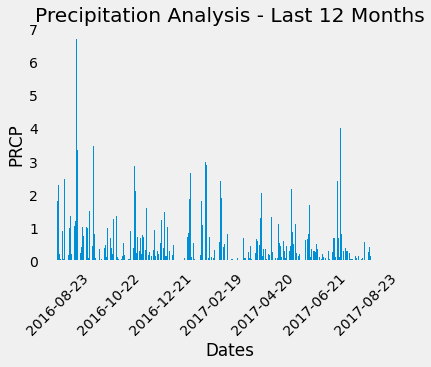

In [107]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#See below




# Starting from the most recent data point in the database. 
recent_date_str = datetime.strptime(recent_date[0], '%Y-%m-%d')
date1 = dt.date(recent_date_str.year - 1, recent_date_str.month, recent_date_str.day)
print(date1) #2016-08-23




# Calculate the date one year from the last date in data set.
last_date_str = datetime.strptime(last_date[0], '%Y-%m-%d')
date2 = dt.date(last_date_str.year + 1, last_date_str.month, last_date_str.day)
print(date2) #2011-01-01


# Perform a query to retrieve the data and precipitation scores
last12m_prcp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= date1).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last12m_prcp_df = pd.DataFrame(last12m_prcp)
print(last12m_prcp_df)

# Sort the dataframe by date
last12m_prcp_df.sort_values(by='date', ascending = False)

# Use Pandas Plotting with Matplotlib to plot the data
x_axis = last12m_prcp_df['date']
y_axis = last12m_prcp_df['prcp']
plt.bar(x_axis, y_axis, align='center')
plt.tick_params(axis='x', pad = 10)
tick_locations = np.arange(0,450,60)
plt.xticks(tick_locations, rotation = 45)
plt.xlabel('Dates')
plt.ylabel('PRCP')
plt.title('Precipitation Analysis - Last 12 Months')
plt.grid()
plt.show()


In [118]:
# Use Pandas to calcualte the summary statistics for the precipitation data
mean = last12m_prcp_df['prcp'].mean()
print(mean)

max = last12m_prcp_df['prcp'].max()
print(max)

min = last12m_prcp_df['prcp'].min()
print(min)

std = last12m_prcp_df['prcp'].std()
print(std)



0.17727857496288965
6.7
0.0
0.4611895038877035


# Exploratory Station Analysis

In [119]:
# Design a query to calculate the total number stations in the dataset
total_stations =  session.query(station.id).count()
total_stations

9

In [166]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active




[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [176]:
first = (active.pop(0))[0]
first

'USC00514830'

In [198]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(measurement.station, measurement.tobs).filter(measurement.station == 'USC00519281').all()
print(most_active)

[('USC00519281', 70.0), ('USC00519281', 62.0), ('USC00519281', 74.0), ('USC00519281', 75.0), ('USC00519281', 74.0), ('USC00519281', 76.0), ('USC00519281', 69.0), ('USC00519281', 66.0), ('USC00519281', 70.0), ('USC00519281', 75.0), ('USC00519281', 64.0), ('USC00519281', 60.0), ('USC00519281', 61.0), ('USC00519281', 68.0), ('USC00519281', 64.0), ('USC00519281', 66.0), ('USC00519281', 67.0), ('USC00519281', 70.0), ('USC00519281', 67.0), ('USC00519281', 67.0), ('USC00519281', 69.0), ('USC00519281', 60.0), ('USC00519281', 75.0), ('USC00519281', 75.0), ('USC00519281', 65.0), ('USC00519281', 75.0), ('USC00519281', 69.0), ('USC00519281', 67.0), ('USC00519281', 66.0), ('USC00519281', 69.0), ('USC00519281', 72.0), ('USC00519281', 67.0), ('USC00519281', 65.0), ('USC00519281', 64.0), ('USC00519281', 67.0), ('USC00519281', 67.0), ('USC00519281', 68.0), ('USC00519281', 69.0), ('USC00519281', 66.0), ('USC00519281', 69.0), ('USC00519281', 61.0), ('USC00519281', 71.0), ('USC00519281', 70.0), ('USC00519

In [186]:
sel = [func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]
mostactivestationdata = session.query(*sel).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).first()
mostactivestationdata

(54.0, 85.0, 71.66378066378067)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()